In [356]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [357]:
flt_train_df = pd.read_csv("flt_train.csv")
pax_train_df = pd.read_csv("pax_train.csv")
aircft_df = pd.read_csv("aircraft.xls") 
airport_df = pd.read_csv("airports.xls")

In [358]:
aircft_df = aircft_df[['FLEET_CD','EQUIP_TYPE']].drop_duplicates()

In [359]:
# Drop index
flt_train_df.drop(flt_train_df.columns[0], axis=1, inplace=True)
pax_train_df.drop(pax_train_df.columns[0], axis=1, inplace=True)
airport_df.drop(airport_df.columns[0], axis=1, inplace=True)

## Preparing Flt data

In [360]:
flt_train_df.info()
flt_train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41623 entries, 0 to 41622
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FLIGHT_ID             41623 non-null  object 
 1   OPERAT_AIRLINE        41623 non-null  object 
 2   FLIGHT_NBR            41623 non-null  int64  
 3   FLIGHT_DEP_DT         41623 non-null  object 
 4   FLIGHT_ARVL_DT        41623 non-null  object 
 5   LEG_ORIG              41623 non-null  object 
 6   LEG_DEST              41623 non-null  object 
 7   SCHD_DTM              41623 non-null  object 
 8   SCHD_ATM              41623 non-null  object 
 9   LEG_DISTANC_MILE_QTY  41623 non-null  int64  
 10  SEATS                 41623 non-null  int64  
 11  PAX                   41623 non-null  int64  
 12  LF                    41623 non-null  float64
 13  FLEET                 41623 non-null  int64  
 14  SUB_FLEET             41623 non-null  object 
 15  ORIG_REGION        

(41623, 22)

In [361]:
flt_train_df.isnull().sum()

FLIGHT_ID               0
OPERAT_AIRLINE          0
FLIGHT_NBR              0
FLIGHT_DEP_DT           0
FLIGHT_ARVL_DT          0
LEG_ORIG                0
LEG_DEST                0
SCHD_DTM                0
SCHD_ATM                0
LEG_DISTANC_MILE_QTY    0
SEATS                   0
PAX                     0
LF                      0
FLEET                   0
SUB_FLEET               0
ORIG_REGION             0
DEST_REGION             0
ORIGN_SUB_REGION        0
DEST_SUB_REGION         0
GATE_BAGS               0
DISTANCE_BIN            0
FLIGHT_DEP_MONTH        0
dtype: int64

In [362]:
import datetime
flt_train_df['ELAPSED_TIME']=(pd.to_datetime(flt_train_df['FLIGHT_ARVL_DT']+' '+flt_train_df['SCHD_ATM']) - (pd.to_datetime(flt_train_df['FLIGHT_DEP_DT']+' '+flt_train_df['SCHD_DTM'])))/np.timedelta64(1,'m')


In [363]:
flt_train_df['OCCUPANCY_RATIO']=(flt_train_df['PAX'])/flt_train_df['SEATS']

In [364]:
aircft_df["FLEET_CD"]=aircft_df["FLEET_CD"].str.strip()
flt_train_df["FLEET"]=flt_train_df["FLEET"].astype('string').str.strip()

In [365]:
flt_train_df1 = flt_train_df.set_index("FLEET").join(aircft_df.set_index("FLEET_CD"))

In [366]:
flt_train_df1.reset_index(inplace=True)

In [367]:
flt_train_df1.columns

Index(['index', 'FLIGHT_ID', 'OPERAT_AIRLINE', 'FLIGHT_NBR', 'FLIGHT_DEP_DT',
       'FLIGHT_ARVL_DT', 'LEG_ORIG', 'LEG_DEST', 'SCHD_DTM', 'SCHD_ATM',
       'LEG_DISTANC_MILE_QTY', 'SEATS', 'PAX', 'LF', 'SUB_FLEET',
       'ORIG_REGION', 'DEST_REGION', 'ORIGN_SUB_REGION', 'DEST_SUB_REGION',
       'GATE_BAGS', 'DISTANCE_BIN', 'FLIGHT_DEP_MONTH', 'ELAPSED_TIME',
       'OCCUPANCY_RATIO', 'EQUIP_TYPE'],
      dtype='object')

In [368]:
flt_train_df1

,index,FLIGHT_ID,OPERAT_AIRLINE,FLIGHT_NBR,FLIGHT_DEP_DT,FLIGHT_ARVL_DT,LEG_ORIG,LEG_DEST,SCHD_DTM,SCHD_ATM,...,ORIG_REGION,DEST_REGION,ORIGN_SUB_REGION,DEST_SUB_REGION,GATE_BAGS,DISTANCE_BIN,FLIGHT_DEP_MONTH,ELAPSED_TIME,OCCUPANCY_RATIO,EQUIP_TYPE
0,319,2573DFW20191006,AA,2573,10/6/2019,10/6/2019,DFW,XNA,20:38:00,21:51:00,...,USA,USA,Hubs,Envoy,1,"(172.737, 401.3]",10,73.0,0.976562,NARROW_BODY
1,319,1856DFW20190812,AA,1856,8/12/2019,8/12/2019,DFW,XNA,10:30:00,11:43:00,...,USA,USA,Hubs,Envoy,16,"(172.737, 401.3]",8,73.0,0.820312,NARROW_BODY
2,319,1397DFW20190426,AA,1397,4/26/2019,4/26/2019,DFW,VPS,10:50:00,12:41:00,...,USA,USA,Hubs,Piedmont,1,"(627.6, 853.9]",4,111.0,0.976562,NARROW_BODY
3,319,2733DFW20191024,AA,2733,10/24/2019,10/24/2019,DFW,SAV,10:55:00,14:22:00,...,USA,USA,Hubs,Central,5,"(853.9, 1080.2]",10,207.0,0.968750,NARROW_BODY
4,319,1833DFW20190916,AA,1833,9/16/2019,9/16/2019,DFW,GRR,18:48:00,22:14:00,...,USA,USA,Hubs,Envoy,1,"(853.9, 1080.2]",9,206.0,0.726562,NARROW_BODY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41618,321,388DFW20190127,AA,388,1/27/2019,1/27/2019,DFW,DCA,7:09:00,11:00:00,...,USA,USA,Hubs,Hubs,9,"(1080.2, 1306.5]",1,231.0,0.900552,NARROW_BODY
41619,321,1190DFW20191118,AA,1190,11/18/2019,11/18/2019,DFW,CUN,9:12:00,13:02:00,...,USA,CARIBBEAN and LATIN AMERICA,Hubs,Mexico/Central America,0,"(853.9, 1080.2]",11,230.0,0.552486,NARROW_BODY
41620,321,2394DFW20190721,AA,2394,7/21/2019,7/22/2019,DFW,SEA,22:21:00,0:31:00,...,USA,USA,Hubs,West,0,"(1532.8, 1759.1]",7,130.0,0.535912,NARROW_BODY
41621,321,1331DFW20191113,AA,1331,11/13/2019,11/13/2019,DFW,LAX,12:35:00,14:00:00,...,USA,USA,Hubs,Hubs,0,"(1080.2, 1306.5]",11,85.0,0.828729,NARROW_BODY


In [369]:
flt_train_df1.loc[(flt_train_df1['ORIG_REGION']=='USA') & (flt_train_df1['DEST_REGION']=='USA'),'ENTITY'] = 'Domestic'
flt_train_df1.loc[(flt_train_df1['ORIG_REGION']!='USA') | (flt_train_df1['DEST_REGION']!='USA'),'ENTITY'] = 'International'

In [370]:
flt_train_df1

,index,FLIGHT_ID,OPERAT_AIRLINE,FLIGHT_NBR,FLIGHT_DEP_DT,FLIGHT_ARVL_DT,LEG_ORIG,LEG_DEST,SCHD_DTM,SCHD_ATM,...,DEST_REGION,ORIGN_SUB_REGION,DEST_SUB_REGION,GATE_BAGS,DISTANCE_BIN,FLIGHT_DEP_MONTH,ELAPSED_TIME,OCCUPANCY_RATIO,EQUIP_TYPE,ENTITY
0,319,2573DFW20191006,AA,2573,10/6/2019,10/6/2019,DFW,XNA,20:38:00,21:51:00,...,USA,Hubs,Envoy,1,"(172.737, 401.3]",10,73.0,0.976562,NARROW_BODY,Domestic
1,319,1856DFW20190812,AA,1856,8/12/2019,8/12/2019,DFW,XNA,10:30:00,11:43:00,...,USA,Hubs,Envoy,16,"(172.737, 401.3]",8,73.0,0.820312,NARROW_BODY,Domestic
2,319,1397DFW20190426,AA,1397,4/26/2019,4/26/2019,DFW,VPS,10:50:00,12:41:00,...,USA,Hubs,Piedmont,1,"(627.6, 853.9]",4,111.0,0.976562,NARROW_BODY,Domestic
3,319,2733DFW20191024,AA,2733,10/24/2019,10/24/2019,DFW,SAV,10:55:00,14:22:00,...,USA,Hubs,Central,5,"(853.9, 1080.2]",10,207.0,0.968750,NARROW_BODY,Domestic
4,319,1833DFW20190916,AA,1833,9/16/2019,9/16/2019,DFW,GRR,18:48:00,22:14:00,...,USA,Hubs,Envoy,1,"(853.9, 1080.2]",9,206.0,0.726562,NARROW_BODY,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41618,321,388DFW20190127,AA,388,1/27/2019,1/27/2019,DFW,DCA,7:09:00,11:00:00,...,USA,Hubs,Hubs,9,"(1080.2, 1306.5]",1,231.0,0.900552,NARROW_BODY,Domestic
41619,321,1190DFW20191118,AA,1190,11/18/2019,11/18/2019,DFW,CUN,9:12:00,13:02:00,...,CARIBBEAN and LATIN AMERICA,Hubs,Mexico/Central America,0,"(853.9, 1080.2]",11,230.0,0.552486,NARROW_BODY,International
41620,321,2394DFW20190721,AA,2394,7/21/2019,7/22/2019,DFW,SEA,22:21:00,0:31:00,...,USA,Hubs,West,0,"(1532.8, 1759.1]",7,130.0,0.535912,NARROW_BODY,Domestic
41621,321,1331DFW20191113,AA,1331,11/13/2019,11/13/2019,DFW,LAX,12:35:00,14:00:00,...,USA,Hubs,Hubs,0,"(1080.2, 1306.5]",11,85.0,0.828729,NARROW_BODY,Domestic


In [371]:
flt_train_df1.drop(['index','OPERAT_AIRLINE','FLIGHT_NBR','FLIGHT_DEP_DT','FLIGHT_ARVL_DT','SCHD_DTM','SCHD_ATM','SEATS','PAX','SUB_FLEET','DISTANCE_BIN','FLIGHT_DEP_MONTH', 'LEG_ORIG','LEG_DEST','ORIG_REGION','DEST_REGION'], axis=1, inplace=True)

In [372]:
flt_train_df1

,FLIGHT_ID,LEG_DISTANC_MILE_QTY,LF,ORIGN_SUB_REGION,DEST_SUB_REGION,GATE_BAGS,ELAPSED_TIME,OCCUPANCY_RATIO,EQUIP_TYPE,ENTITY
0,2573DFW20191006,280,93.75,Hubs,Envoy,1,73.0,0.976562,NARROW_BODY,Domestic
1,1856DFW20190812,280,78.13,Hubs,Envoy,16,73.0,0.820312,NARROW_BODY,Domestic
2,1397DFW20190426,641,84.38,Hubs,Piedmont,1,111.0,0.976562,NARROW_BODY,Domestic
3,2733DFW20191024,925,96.88,Hubs,Central,5,207.0,0.968750,NARROW_BODY,Domestic
4,1833DFW20190916,931,69.53,Hubs,Envoy,1,206.0,0.726562,NARROW_BODY,Domestic
...,...,...,...,...,...,...,...,...,...,...
41618,388DFW20190127,1192,83.43,Hubs,Hubs,9,231.0,0.900552,NARROW_BODY,Domestic
41619,1190DFW20191118,1028,53.59,Hubs,Mexico/Central America,0,230.0,0.552486,NARROW_BODY,International
41620,2394DFW20190721,1659,40.33,Hubs,West,0,130.0,0.535912,NARROW_BODY,Domestic
41621,1331DFW20191113,1235,78.45,Hubs,Hubs,0,85.0,0.828729,NARROW_BODY,Domestic


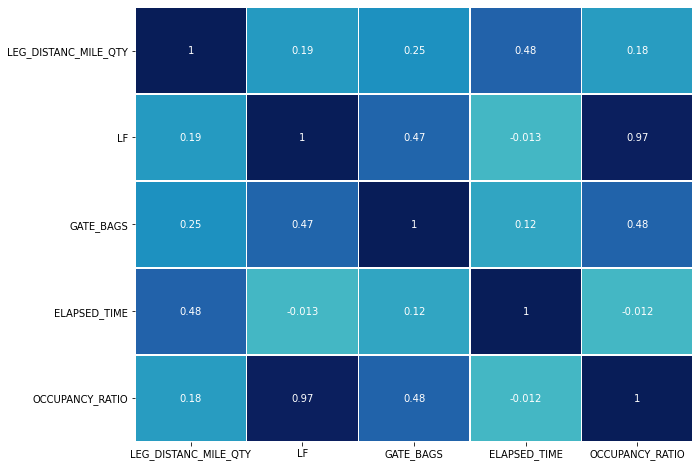

In [373]:
## Correlation betweeen all numeric fields

plt.figure(figsize=(10,8))

sns.heatmap(flt_train_df1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [374]:
flt_train_df1 = pd.get_dummies(flt_train_df1, columns=['ORIGN_SUB_REGION','DEST_SUB_REGION','EQUIP_TYPE','ENTITY'])

In [375]:
flt_train_df1

,FLIGHT_ID,LEG_DISTANC_MILE_QTY,LF,GATE_BAGS,ELAPSED_TIME,OCCUPANCY_RATIO,ORIGN_SUB_REGION_Hubs,DEST_SUB_REGION_Canada,DEST_SUB_REGION_Caribbean,DEST_SUB_REGION_Central,DEST_SUB_REGION_East,DEST_SUB_REGION_Envoy,DEST_SUB_REGION_Hubs,DEST_SUB_REGION_Mexico/Central America,DEST_SUB_REGION_Piedmont,DEST_SUB_REGION_South America,DEST_SUB_REGION_West,EQUIP_TYPE_NARROW_BODY,ENTITY_Domestic,ENTITY_International
0,2573DFW20191006,280,93.75,1,73.0,0.976562,1,0,0,0,0,1,0,0,0,0,0,1,1,0
1,1856DFW20190812,280,78.13,16,73.0,0.820312,1,0,0,0,0,1,0,0,0,0,0,1,1,0
2,1397DFW20190426,641,84.38,1,111.0,0.976562,1,0,0,0,0,0,0,0,1,0,0,1,1,0
3,2733DFW20191024,925,96.88,5,207.0,0.968750,1,0,0,1,0,0,0,0,0,0,0,1,1,0
4,1833DFW20190916,931,69.53,1,206.0,0.726562,1,0,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41618,388DFW20190127,1192,83.43,9,231.0,0.900552,1,0,0,0,0,0,1,0,0,0,0,1,1,0
41619,1190DFW20191118,1028,53.59,0,230.0,0.552486,1,0,0,0,0,0,0,1,0,0,0,1,0,1
41620,2394DFW20190721,1659,40.33,0,130.0,0.535912,1,0,0,0,0,0,0,0,0,0,1,1,1,0
41621,1331DFW20191113,1235,78.45,0,85.0,0.828729,1,0,0,0,0,0,1,0,0,0,0,1,1,0


In [376]:
pax_train_df

,PNR_LOCTR_ID,PNR_CREATE_DT,PARTY_ID,LYLTY_LEVEL_CD,FARE_CLASS_CD,CABIN,OD_ORIGIN_AIRPRT_IATA_CD,OD_DESTNTN_AIRPRT_IATA_CD,REVNUE_ACCT_SLS_OUTLET_ID,FLIGHT_DEP_DT,...,PRIME_CHANL_TYPE_CD,SECOND_CHANL_TYPE_CD,TERTY_CHANL_TYPE_CD,OD_LEGS,OD_LONG_LEG,OD_GCD,TRIP_ORIGIN,TRIP_DESTNTN,ROUND_TRIP_IND,FLIGHT_ID
0,1290606612,2019-05-20,580856729,R,V,Y,DFW,BOS,4510541,2019-07-21,...,DIRECT,RES,RES,1.0,1562.0,1562.0,DFW,BOS,0.0,2747DFW20190721
1,1260610418,2019-06-15,42918754,NaN,S,Y,YYZ,AUS,4510739,2019-07-24,...,DIRECT,WEB,WEB,2.0,1199.0,1359.0,YTO,AUS,0.0,2707DFW20190724
2,1938323699,2019-01-10,2119496752,R,S,Y,XNA,LAS,4510739,2019-07-24,...,DIRECT,WEB,WEB,2.0,1055.0,1163.0,FYV,LAS,0.0,671DFW20190724
3,-2053377118,2019-07-30,14983830,NaN,Y,Y,CLT,SMF,3410110,2019-08-14,...,DIRECT,RES,RES,2.0,1431.0,2244.0,CLT,SAC,0.0,456DFW20190814
4,-380537054,2019-06-13,2013609590,NaN,B,Y,KOA,AUS,1157862,2019-07-27,...,OTA,OTA,OTA,1.0,190.0,3695.0,KOA,AUS,0.0,1176DFW20190727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985927,-38946420,2019-01-08,328819156,P,M,Y,LAS,CLT,2652585,2019-01-10,...,TMC,TMC,TMC,2.0,1055.0,1916.0,LAS,CLT,0.0,1774DFW20190110
5985928,328325791,2018-11-12,-1836071423,R,B,Y,DFW,AUS,4510541,2019-01-10,...,DIRECT,RES,RES,1.0,190.0,190.0,DFW,AUS,0.0,1435DFW20190110
5985929,1383572078,2019-04-02,1934157585,NaN,V,Y,SAT,OKC,0999106,2019-04-03,...,DIRECT,RES,RES,2.0,247.0,407.0,OKC,OKC,1.0,846DFW20190403
5985930,1676224843,2019-05-17,70214682,G,Y,Y,DFW,PBI,4510510,2019-05-26,...,DIRECT,RES,RES,2.0,936.0,1103.0,DFW,PBI,0.0,882DFW20190526


In [377]:
#drop key fields & LYLTY_LEVEL_CD (as lot of null values in this field)
pax_train_df.drop(['PNR_LOCTR_ID','PARTY_ID','LYLTY_LEVEL_CD','REVNUE_ACCT_SLS_OUTLET_ID','PNR_CREATE_DT','FLIGHT_DEP_DT','FLIGHT_ARVL_DT','OD_ORIGIN_AIRPRT_IATA_CD','OD_DESTNTN_AIRPRT_IATA_CD','TERTY_CHANL_TYPE_CD','TRIP_ORIGIN','TRIP_DESTNTN','SECOND_CHANL_TYPE_CD','CABIN','OD_LONG_LEG','FARE_CLASS_CD'], axis=1, inplace=True)


In [378]:
#pax_train_df.drop(['FARE_CLASS_CD'], axis=1, inplace=True)

In [379]:
pax_train_df.columns

Index(['CITI_IND', 'BARCLAY_IND', 'CHILD_IND', 'TRIP_TYPE',
       'PRIME_CHANL_TYPE_CD', 'OD_LEGS', 'OD_GCD', 'ROUND_TRIP_IND',
       'FLIGHT_ID'],
      dtype='object')

In [382]:
pax_train_df.isna().sum()

CITI_IND               0
BARCLAY_IND            0
CHILD_IND              0
TRIP_TYPE              0
PRIME_CHANL_TYPE_CD    0
OD_LEGS                0
OD_GCD                 0
ROUND_TRIP_IND         0
FLIGHT_ID              0
dtype: int64

In [381]:
pax_train_df['TRIP_TYPE']=pax_train_df['TRIP_TYPE'].fillna('X')
pax_train_df['PRIME_CHANL_TYPE_CD']=pax_train_df['PRIME_CHANL_TYPE_CD'].fillna('X')
pax_train_df['OD_LEGS']=pax_train_df['OD_LEGS'].fillna(1)
pax_train_df['ROUND_TRIP_IND']=pax_train_df['ROUND_TRIP_IND'].fillna(0)
pax_train_df['OD_GCD']=pax_train_df['OD_GCD'].fillna(0)

In [383]:
pax_train_df1 = pd.get_dummies(pax_train_df, columns=['PRIME_CHANL_TYPE_CD','TRIP_TYPE'])

In [384]:
pax_train_df2=pax_train_df1.groupby(['FLIGHT_ID']).agg({'CITI_IND':'sum','BARCLAY_IND':'sum','CHILD_IND':'sum','ROUND_TRIP_IND':'sum','OD_LEGS':'sum','OD_GCD':'sum','PRIME_CHANL_TYPE_CD_BUSINESS':'sum', 'PRIME_CHANL_TYPE_CD_DIRECT':'sum','PRIME_CHANL_TYPE_CD_LEISURE':'sum', 'PRIME_CHANL_TYPE_CD_OTA':'sum',
       'PRIME_CHANL_TYPE_CD_TMC':'sum','PRIME_CHANL_TYPE_CD_X':'sum','TRIP_TYPE_L':'sum','TRIP_TYPE_B':'sum','TRIP_TYPE_X':'sum'}).reset_index()

In [385]:
pax_train_df2

,FLIGHT_ID,CITI_IND,BARCLAY_IND,CHILD_IND,ROUND_TRIP_IND,OD_LEGS,OD_GCD,PRIME_CHANL_TYPE_CD_BUSINESS,PRIME_CHANL_TYPE_CD_DIRECT,PRIME_CHANL_TYPE_CD_LEISURE,PRIME_CHANL_TYPE_CD_OTA,PRIME_CHANL_TYPE_CD_TMC,PRIME_CHANL_TYPE_CD_X,TRIP_TYPE_L,TRIP_TYPE_B,TRIP_TYPE_X
0,1001DFW20190105,29,9,17,0.0,290.0,269062.0,3,100,34,37,0,2,173,1,2
1,1001DFW20190106,14,4,10,0.0,168.0,142099.0,4,72,21,32,1,2,129,2,1
2,1001DFW20190120,13,4,17,0.0,271.0,317679.0,15,90,23,39,4,0,147,24,0
3,1001DFW20190126,15,5,4,0.0,220.0,233957.0,2,85,22,11,1,0,117,4,0
4,1001DFW20190127,10,2,4,0.0,132.0,187504.0,6,45,14,3,0,0,59,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41618,999DFW20191127,26,6,15,0.0,234.0,260423.0,7,123,7,18,4,4,154,5,4
41619,999DFW20191129,26,4,16,0.0,244.0,258818.0,5,104,4,43,5,0,153,8,0
41620,999DFW20191130,22,11,9,0.0,275.0,294360.0,4,136,5,26,2,2,158,16,1
41621,999DFW20191201,26,11,11,0.0,288.0,304272.0,11,109,5,20,35,0,115,65,0


In [502]:
jd_train_df = pd.merge(flt_train_df1,pax_train_df2 , how='inner', on='FLIGHT_ID')

In [503]:
jd_train_df.shape

(41623, 35)

In [504]:
df = jd_train_df
df.drop(['FLIGHT_ID'], axis=1, inplace=True)

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41623 entries, 0 to 41622
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LEG_DISTANC_MILE_QTY                    41623 non-null  int64  
 1   LF                                      41623 non-null  float64
 2   GATE_BAGS                               41623 non-null  int64  
 3   ELAPSED_TIME                            41623 non-null  float64
 4   OCCUPANCY_RATIO                         41623 non-null  float64
 5   ORIGN_SUB_REGION_Hubs                   41623 non-null  uint8  
 6   DEST_SUB_REGION_Canada                  41623 non-null  uint8  
 7   DEST_SUB_REGION_Caribbean               41623 non-null  uint8  
 8   DEST_SUB_REGION_Central                 41623 non-null  uint8  
 9   DEST_SUB_REGION_East                    41623 non-null  uint8  
 10  DEST_SUB_REGION_Envoy                   41623 non-null  ui

In [506]:
# Separate the independent attributes i.e. every column except Strength
# Store the target column (Strength) into Y array

x = df.loc[:, df.columns != 'GATE_BAGS']  # independent variables
y = df.loc[:, df.columns == 'GATE_BAGS']  # Target variable

In [507]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [508]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33298, 33), (33298, 1), (8325, 33), (8325, 1))

In [509]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler


sc_X = StandardScaler()
sc_Y = StandardScaler()
x_cols_to_scale = ['LEG_DISTANC_MILE_QTY', 'LF', 'ELAPSED_TIME', 'OCCUPANCY_RATIO',
       'ORIGN_SUB_REGION_Hubs', 'DEST_SUB_REGION_Canada',
       'DEST_SUB_REGION_Caribbean', 'DEST_SUB_REGION_Central',
       'DEST_SUB_REGION_East', 'DEST_SUB_REGION_Envoy', 'DEST_SUB_REGION_Hubs',
       'DEST_SUB_REGION_Mexico/Central America', 'DEST_SUB_REGION_Piedmont',
       'DEST_SUB_REGION_South America', 'DEST_SUB_REGION_West',
       'EQUIP_TYPE_NARROW_BODY', 'ENTITY_Domestic', 'ENTITY_International',
       'CITI_IND', 'BARCLAY_IND', 'CHILD_IND', 'ROUND_TRIP_IND', 'OD_LEGS',
       'OD_GCD', 'PRIME_CHANL_TYPE_CD_BUSINESS', 'PRIME_CHANL_TYPE_CD_DIRECT',
       'PRIME_CHANL_TYPE_CD_LEISURE', 'PRIME_CHANL_TYPE_CD_OTA',
       'PRIME_CHANL_TYPE_CD_TMC', 'PRIME_CHANL_TYPE_CD_X', 'TRIP_TYPE_L',
       'TRIP_TYPE_B', 'TRIP_TYPE_X']
y_cols_to_scale = ['GATE_BAGS']
x_train[x_cols_to_scale] = sc_X.fit_transform(x_train[x_cols_to_scale].to_numpy())
y_train[y_cols_to_scale] = sc_Y.fit_transform(y_train[y_cols_to_scale].to_numpy())

In [510]:
x_train

,LEG_DISTANC_MILE_QTY,LF,ELAPSED_TIME,OCCUPANCY_RATIO,ORIGN_SUB_REGION_Hubs,DEST_SUB_REGION_Canada,DEST_SUB_REGION_Caribbean,DEST_SUB_REGION_Central,DEST_SUB_REGION_East,DEST_SUB_REGION_Envoy,...,OD_GCD,PRIME_CHANL_TYPE_CD_BUSINESS,PRIME_CHANL_TYPE_CD_DIRECT,PRIME_CHANL_TYPE_CD_LEISURE,PRIME_CHANL_TYPE_CD_OTA,PRIME_CHANL_TYPE_CD_TMC,PRIME_CHANL_TYPE_CD_X,TRIP_TYPE_L,TRIP_TYPE_B,TRIP_TYPE_X
18602,0.827305,0.636522,1.365229,0.607637,0.0,-0.045898,-0.047194,-0.476195,-0.367131,-0.210901,...,0.523052,1.262209,0.122557,-0.245308,-1.186646,2.396839,-0.702885,-1.392293,2.524543,-0.619239
10351,-1.652073,-2.947782,-0.957537,-3.313458,0.0,-0.045898,-0.047194,-0.476195,-0.367131,4.741558,...,-1.673458,-1.206306,-2.093597,-0.245308,-0.808672,-0.965928,-0.702885,-1.580049,-0.980910,-0.619239
28861,0.033305,-0.161285,1.029569,-0.320893,0.0,-0.045898,-0.047194,-0.476195,2.723824,-0.210901,...,1.220229,-0.218900,-0.965373,5.746399,-1.186646,-0.108752,-0.702885,0.512091,-0.362300,-0.619239
6487,-0.089041,0.796471,0.210559,0.715072,0.0,-0.045898,-0.047194,-0.476195,-0.367131,-0.210901,...,-0.823303,-1.206306,0.283732,0.093845,0.400844,-1.097802,-0.702885,0.780314,-1.334401,-0.619239
7135,-0.114010,-0.165171,0.801320,-0.122025,0.0,-0.045898,-0.047194,2.099979,-0.367131,-0.210901,...,-0.318892,-0.515122,-1.086254,0.432998,-0.052724,-0.636245,0.484446,-0.426690,-0.627419,-0.619239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,-1.986651,0.442250,-1.105227,0.662753,0.0,-0.045898,-0.047194,2.099979,-0.367131,-0.210901,...,-1.112240,0.867247,-0.683317,-0.584462,-0.430698,-0.768119,-0.109220,-0.560801,-0.273928,-0.619239
35814,-0.256330,0.124941,-1.561725,0.012095,0.0,-0.045898,-0.047194,-0.476195,-0.367131,-0.210901,...,0.456607,-1.008825,1.049313,-0.245308,0.854413,-0.636245,-0.702885,0.860781,-0.509588,-0.619239
20463,-0.086544,-0.402829,0.935584,-0.430901,0.0,-0.045898,-0.047194,-0.476195,-0.367131,-0.210901,...,0.115044,-1.107565,0.082263,-0.245308,1.232387,-0.899992,5.827431,0.646203,-0.980910,9.563654
18638,0.033305,0.232437,1.069848,0.160091,0.0,-0.045898,-0.047194,-0.476195,2.723824,-0.210901,...,-0.320765,2.052134,-0.360967,-0.019206,-1.111051,1.341853,-0.702885,-0.802202,1.375697,-0.619239


In [511]:
y_train

,GATE_BAGS
18602,5.175729
10351,-1.048570
28861,-0.386410
6487,0.010886
7135,-1.048570
...,...
5520,-1.048570
35814,0.937909
20463,-0.651274
18638,-0.253978


In [512]:
# Apply Standard Scaling on test data
x_test[x_cols_to_scale] = sc_X.transform(x_test[x_cols_to_scale].to_numpy())
y_test[y_cols_to_scale] = sc_Y.transform(y_test[y_cols_to_scale].to_numpy())


In [513]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33298, 33), (33298, 1), (8325, 33), (8325, 1))

In [514]:
y_test

,GATE_BAGS
20872,0.275749
35986,-1.048570
10086,-0.121546
3390,-0.916138
9573,-0.916138
...,...
31354,0.275749
25353,0.937909
27639,-0.518842
12904,-0.121546


In [515]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
xgb = XGBRegressor(max_depth=5,learning_rate=0.1,subsample=0.8,n_estimators=250)
xgb.fit(x_train, y_train)
Score_XG = xgb.score(x_test, y_test)

In [516]:
pred_xgb = xgb.predict(x_test)
RMSE_XG = mean_squared_error(y_test, pred_xgb)**0.5


print ("Root Mean Squared Error : ",RMSE_XG)
print("Training Score :",xgb.score(x_train, y_train))  # performance on train data
print("Testing Score : ",Score_XG)  # performance on test data

Root Mean Squared Error :  0.7556136117211703
Training Score : 0.5910369167403986
Testing Score :  0.44314248645811405


In [517]:
## Feature Importance of RandomForest
pd.Series(xgb.feature_importances_, x_train.columns).sort_values(ascending= False)

OCCUPANCY_RATIO                           0.361474
DEST_SUB_REGION_Hubs                      0.309284
LEG_DISTANC_MILE_QTY                      0.023713
ENTITY_Domestic                           0.021875
PRIME_CHANL_TYPE_CD_DIRECT                0.018674
OD_LEGS                                   0.017618
CITI_IND                                  0.017430
TRIP_TYPE_B                               0.016970
DEST_SUB_REGION_East                      0.015145
PRIME_CHANL_TYPE_CD_OTA                   0.015098
PRIME_CHANL_TYPE_CD_TMC                   0.014754
ROUND_TRIP_IND                            0.013901
LF                                        0.012730
DEST_SUB_REGION_Piedmont                  0.012638
ELAPSED_TIME                              0.012464
OD_GCD                                    0.011133
DEST_SUB_REGION_Envoy                     0.010716
TRIP_TYPE_L                               0.010647
TRIP_TYPE_X                               0.010593
DEST_SUB_REGION_Central        

## Scores

In [518]:
flt_score_df = pd.read_csv('fltscore.csv')
pax_score_df = pd.read_csv('paxscore.csv')

In [519]:
flt_score_df.head(2)

,Unnamed: 0,FLIGHT_ID,OPERAT_AIRLINE,FLIGHT_NBR,FLIGHT_DEP_DT,FLIGHT_ARVL_DT,LEG_ORIG,LEG_DEST,SCHD_DTM,SCHD_ATM,LEG_DISTANC_MILE_QTY,SEATS,PAX,LF,FLEET,SUB_FLEET,ORIG_REGION,DEST_REGION,ORIGN_SUB_REGION,DEST_SUB_REGION
0,0,1001DFW20190313,AA,1001,2019-03-13,2019-03-13,DFW,CUN,11:00:00,13:45:00,1028,181,181,99.45,321,32S,USA,CARIBBEAN and LATIN AMERICA,Hubs,Mexico/Central America
1,1,1001DFW20190320,AA,1001,2019-03-20,2019-03-20,DFW,CUN,11:00:00,13:45:00,1028,181,180,95.58,321,32S,USA,CARIBBEAN and LATIN AMERICA,Hubs,Mexico/Central America


In [520]:
# Drop index
flt_score_df.drop(flt_score_df.columns[0], axis=1, inplace=True)
pax_score_df.drop(pax_score_df.columns[0], axis=1, inplace=True)

In [521]:
print(flt_score_df.shape)
print(pax_score_df.shape)

(5179, 19)
(747582, 25)


In [522]:
import datetime
flt_score_df['ELAPSED_TIME']=(pd.to_datetime(flt_score_df['FLIGHT_ARVL_DT']+' '+flt_score_df['SCHD_ATM']) - (pd.to_datetime(flt_score_df['FLIGHT_DEP_DT']+' '+flt_score_df['SCHD_DTM'])))/np.timedelta64(1,'m')


flt_score_df['OCCUPANCY_RATIO']=(flt_score_df['PAX'])/flt_score_df['SEATS']

flt_score_df["FLEET"]=flt_score_df["FLEET"].astype('string').str.strip()
flt_score_df1 = flt_score_df.set_index("FLEET").join(aircft_df.set_index("FLEET_CD"))

flt_score_df1.reset_index(inplace=True)
flt_score_df1.columns

Index(['index', 'FLIGHT_ID', 'OPERAT_AIRLINE', 'FLIGHT_NBR', 'FLIGHT_DEP_DT',
       'FLIGHT_ARVL_DT', 'LEG_ORIG', 'LEG_DEST', 'SCHD_DTM', 'SCHD_ATM',
       'LEG_DISTANC_MILE_QTY', 'SEATS', 'PAX', 'LF', 'SUB_FLEET',
       'ORIG_REGION', 'DEST_REGION', 'ORIGN_SUB_REGION', 'DEST_SUB_REGION',
       'ELAPSED_TIME', 'OCCUPANCY_RATIO', 'EQUIP_TYPE'],
      dtype='object')

In [523]:
flt_score_df1.loc[(flt_score_df1['ORIG_REGION']=='USA') & (flt_score_df1['DEST_REGION']=='USA'),'ENTITY'] = 'Domestic'
flt_score_df1.loc[(flt_score_df1['ORIG_REGION']!='USA') | (flt_score_df1['DEST_REGION']!='USA'),'ENTITY'] = 'International'

In [524]:
flt_score_df1.drop(['index','OPERAT_AIRLINE','FLIGHT_NBR','FLIGHT_DEP_DT','FLIGHT_ARVL_DT','SCHD_DTM','SCHD_ATM','SEATS','PAX','SUB_FLEET','LEG_ORIG','LEG_DEST','ORIG_REGION','DEST_REGION'], axis=1, inplace=True)

In [525]:
flt_score_df1 = pd.get_dummies(flt_score_df1, columns=['ORIGN_SUB_REGION','DEST_SUB_REGION','EQUIP_TYPE','ENTITY'])

In [526]:
flt_score_df1.shape

(5179, 19)

In [527]:
pax_score_df

#drop key fields & LYLTY_LEVEL_CD (as lot of null values in this field)
pax_score_df.drop(['PNR_LOCTR_ID','PARTY_ID','LYLTY_LEVEL_CD','REVNUE_ACCT_SLS_OUTLET_ID','PNR_CREATE_DT','FLIGHT_DEP_DT','FLIGHT_ARVL_DT','OD_ORIGIN_AIRPRT_IATA_CD','OD_DESTNTN_AIRPRT_IATA_CD','TERTY_CHANL_TYPE_CD','TRIP_ORIGIN','TRIP_DESTNTN','SECOND_CHANL_TYPE_CD','CABIN','OD_LONG_LEG','FARE_CLASS_CD'], axis=1, inplace=True)

In [528]:
pax_score_df['TRIP_TYPE']=pax_score_df['TRIP_TYPE'].fillna('X')
pax_score_df['PRIME_CHANL_TYPE_CD']=pax_score_df['PRIME_CHANL_TYPE_CD'].fillna('X')
pax_score_df['OD_LEGS']=pax_score_df['OD_LEGS'].fillna(1)
pax_score_df['ROUND_TRIP_IND']=pax_score_df['ROUND_TRIP_IND'].fillna(0)
pax_score_df['OD_GCD']=pax_score_df['OD_GCD'].fillna(0)

In [529]:
pax_score_df1 = pd.get_dummies(pax_score_df, columns=['PRIME_CHANL_TYPE_CD','TRIP_TYPE'])

pax_score_df2=pax_score_df1.groupby(['FLIGHT_ID']).agg({'CITI_IND':'sum','BARCLAY_IND':'sum','CHILD_IND':'sum','ROUND_TRIP_IND':'sum','OD_LEGS':'sum','OD_GCD':'sum','PRIME_CHANL_TYPE_CD_BUSINESS':'sum', 'PRIME_CHANL_TYPE_CD_DIRECT':'sum','PRIME_CHANL_TYPE_CD_LEISURE':'sum', 'PRIME_CHANL_TYPE_CD_OTA':'sum',
       'PRIME_CHANL_TYPE_CD_TMC':'sum','PRIME_CHANL_TYPE_CD_X':'sum','TRIP_TYPE_L':'sum','TRIP_TYPE_B':'sum','TRIP_TYPE_X':'sum'}).reset_index()

In [530]:
jd_score_df = pd.merge(flt_score_df1,pax_score_df2 , how='inner', on='FLIGHT_ID')

In [531]:
jd_score_df.shape

(5179, 34)

In [532]:
df_score = jd_score_df
df_score.drop(['FLIGHT_ID'], axis=1, inplace=True)

In [533]:
df_score

,LEG_DISTANC_MILE_QTY,LF,ELAPSED_TIME,OCCUPANCY_RATIO,ORIGN_SUB_REGION_Hubs,DEST_SUB_REGION_Canada,DEST_SUB_REGION_Caribbean,DEST_SUB_REGION_Central,DEST_SUB_REGION_East,DEST_SUB_REGION_Envoy,...,OD_GCD,PRIME_CHANL_TYPE_CD_BUSINESS,PRIME_CHANL_TYPE_CD_DIRECT,PRIME_CHANL_TYPE_CD_LEISURE,PRIME_CHANL_TYPE_CD_OTA,PRIME_CHANL_TYPE_CD_TMC,PRIME_CHANL_TYPE_CD_X,TRIP_TYPE_L,TRIP_TYPE_B,TRIP_TYPE_X
0,631,100.00,104.0,1.000000,1,0,0,1,0,0,...,130235.0,18,74,8,7,21,0,48,80,0
1,550,58.59,91.0,0.648438,1,0,0,1,0,0,...,108750.0,4,50,4,16,0,1,68,6,1
2,550,97.66,96.0,0.992188,1,0,0,1,0,0,...,150435.0,13,62,10,29,9,2,90,33,2
3,550,85.16,96.0,0.867188,1,0,0,1,0,0,...,115363.0,21,38,3,15,31,1,28,80,1
4,550,91.41,96.0,0.929688,1,0,0,1,0,0,...,141424.0,8,57,6,30,16,0,71,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,1119,96.13,217.0,0.977901,1,0,0,0,1,0,...,327474.0,5,107,12,35,6,9,164,8,2
5175,1302,100.00,250.0,1.000000,1,0,0,0,0,0,...,410461.0,24,95,19,14,33,2,88,97,2
5176,1302,85.03,248.0,0.946524,1,0,0,0,0,0,...,374244.0,30,89,6,13,16,2,84,70,2
5177,225,58.01,70.0,0.629834,1,0,0,1,0,0,...,96952.0,16,49,2,7,31,0,34,71,0


In [534]:
df_score[x_cols_to_scale] = sc_X.transform(df_score[x_cols_to_scale].to_numpy())

In [535]:
df_score

,LEG_DISTANC_MILE_QTY,LF,ELAPSED_TIME,OCCUPANCY_RATIO,ORIGN_SUB_REGION_Hubs,DEST_SUB_REGION_Canada,DEST_SUB_REGION_Caribbean,DEST_SUB_REGION_Central,DEST_SUB_REGION_East,DEST_SUB_REGION_Envoy,...,OD_GCD,PRIME_CHANL_TYPE_CD_BUSINESS,PRIME_CHANL_TYPE_CD_DIRECT,PRIME_CHANL_TYPE_CD_LEISURE,PRIME_CHANL_TYPE_CD_OTA,PRIME_CHANL_TYPE_CD_TMC,PRIME_CHANL_TYPE_CD_X,TRIP_TYPE_L,TRIP_TYPE_B,TRIP_TYPE_X
0,-0.848085,0.948003,-0.501040,0.715072,0.0,-0.045898,-0.047194,2.099979,-0.367131,-0.210901,...,-1.073332,0.373544,-0.159499,0.093845,-1.262240,0.089057,-0.702885,-1.070425,0.727630,-0.619239
1,-1.050330,-1.733587,-0.675583,-1.639264,0.0,-0.045898,-0.047194,2.099979,-0.367131,-0.210901,...,-1.290852,-1.008825,-1.126548,-0.358359,-0.581888,-1.295611,-0.109220,-0.533979,-1.452231,0.306478
2,-1.050330,0.796471,-0.608451,0.662753,0.0,-0.045898,-0.047194,2.099979,-0.367131,-0.210901,...,-0.868822,-0.120159,-0.643023,0.319947,0.400844,-0.702182,0.484446,0.056112,-0.656876,1.232196
3,-1.050330,-0.012992,-0.608451,-0.174344,0.0,-0.045898,-0.047194,2.099979,-0.367131,-0.210901,...,-1.223900,0.669765,-1.610073,-0.471411,-0.657482,0.748423,-0.109220,-1.606871,0.727630,0.306478
4,-1.050330,0.391740,-0.608451,0.244205,0.0,-0.045898,-0.047194,2.099979,-0.367131,-0.210901,...,-0.960052,-0.613862,-0.844492,-0.132257,0.476439,-0.240626,-0.702885,-0.453512,-0.273928,-0.619239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,0.370380,0.697393,1.016143,0.567077,0.0,-0.045898,-0.047194,-0.476195,2.723824,-0.210901,...,0.923568,-0.910084,1.170194,0.546049,0.854413,-0.899992,4.640101,2.040963,-1.393316,1.232196
5175,0.827305,0.948003,1.459214,0.715072,0.0,-0.045898,-0.047194,-0.476195,-0.367131,-0.210901,...,1.763751,0.965987,0.686669,1.337407,-0.733077,0.880297,0.484446,0.002467,1.228409,1.232196
5176,0.827305,-0.021410,1.432361,0.356956,0.0,-0.045898,-0.047194,-0.476195,-0.367131,-0.210901,...,1.397080,1.558431,0.444907,-0.132257,-0.808672,-0.240626,0.484446,-0.104822,0.433054,1.232196
5177,-1.861808,-1.771146,-0.957537,-1.763845,0.0,-0.045898,-0.047194,2.099979,-0.367131,-0.210901,...,-1.410298,0.176062,-1.166842,-0.584462,-1.262240,0.748423,-0.702885,-1.445937,0.462512,-0.619239


In [536]:
pred_test = xgb.predict(df_score)

In [537]:
# Applying Inverse of Scaling
pred_test =sc_Y.inverse_transform(pred_test)

In [538]:
# Writing target field HR to dataframe
result = pd.DataFrame(pred_test, columns=['GATE_BAGS_OUT'])

In [539]:
result

,GATE_BAGS_OUT
0,9.232841
1,0.890517
2,5.413265
3,2.830277
4,3.869017
...,...
5174,8.949715
5175,12.574825
5176,13.326025
5177,0.655261


In [540]:
result.to_csv('submission_xgb.csv',index=False)